# Analyzing Agricultural and Climate Trends Across Countries: A Data-Driven Approach

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import math

# 1. Data Analyzing

## 1.1 Data Column Explanations

- **Year:** The year in which the data was collected or pertains to, helping track changes over time.
- **Country:** The specific country where the data is recorded, allowing for geographic comparisons and analyses.
- **Region:** A subdivision within the country that may have distinct agricultural practices, climates, or economic conditions.
- **Crop_Type:** The specific type of crop being analyzed (e.g., wheat, rice, maize), helping understand how different crops respond to environmental factors.
- **Average_Temperature_C:** The average temperature in degrees Celsius during the growing season, significantly affecting crop growth and yield.
- **Total_Precipitation_mm:** The total amount of precipitation (rainfall) received, measured in millimeters, indicating water availability for crops.
- **CO2_Emissions_MT:** The total carbon dioxide emissions measured in metric tons, indicating the environmental impact of agricultural practices.
- **Crop_Yield_MT_per_HA:** The average yield of the crop per hectare, measured in metric tons, reflecting productivity and efficiency in agriculture.
- **Extreme_Weather_Events:** The occurrence of severe weather conditions (like droughts, floods, or storms) that can negatively affect crop production.
- **Irrigation_Access_%:** The percentage of farmland with access to irrigation, which can improve crop yields, especially in arid regions.
- **Pesticide_Use_KG_per_HA:** The amount of pesticides used per hectare, measured in kilograms, indicating reliance on chemical treatments for pest control.
- **Fertilizer_Use_KG_per_HA:** The quantity of fertilizers applied per hectare, measured in kilograms, affecting soil fertility and crop productivity.
- **Soil_Health_Index:** A metric indicating the overall health of the soil, crucial for sustainable agriculture and crop yield.
- **Adaptation_Strategies:** Measures or practices adopted to cope with changes in climate or extreme weather events, such as crop rotation or using drought-resistant varieties.
- **Economic_Impact_Million_USD:** The financial effect of agricultural practices and outcomes, measured in millions of U.S. dollars, reflecting the economic value generated or lost.
erated or lost.
        </li>
    </ul>
</div>

## 1.2. Checking for NaN Values

In [3]:
df = pd.read_csv("climate_change.csv")
display(df.notnull().any())

Year                           True
Country                        True
Region                         True
Crop_Type                      True
Average_Temperature_C          True
Total_Precipitation_mm         True
CO2_Emissions_MT               True
Crop_Yield_MT_per_HA           True
Extreme_Weather_Events         True
Irrigation_Access_%            True
Pesticide_Use_KG_per_HA        True
Fertilizer_Use_KG_per_HA       True
Soil_Health_Index              True
Adaptation_Strategies          True
Economic_Impact_Million_USD    True
dtype: bool

## 1.3. Checking Data Types

In [3]:
data_types = pd.DataFrame(df.dtypes,columns=["Data types"])
display(data_types)

Data types
Year                             int64
Country                         object
Region                          object
Crop_Type                       object
Average_Temperature_C          float64
Total_Precipitation_mm         float64
CO2_Emissions_MT               float64
Crop_Yield_MT_per_HA           float64
Extreme_Weather_Events           int64
Irrigation_Access_%            float64
Pesticide_Use_KG_per_HA        float64
Fertilizer_Use_KG_per_HA       float64
Soil_Health_Index              float64
Adaptation_Strategies           object
Economic_Impact_Million_USD    float64

## 1.4. Checking Unique Values of Columns

In [4]:
uniques_columns = ["Year","Country","Region","Crop_Type","Adaptation_Strategies"]
df_uniqes = df[["Year","Country","Region","Crop_Type","Adaptation_Strategies"]]
counts = list()
pd.unique(df_uniqes["Year"]).size

for col in uniques_columns:
    counts.append(pd.unique(df_uniqes[col]).size)

result = pd.DataFrame(counts,index=uniques_columns,columns=["unique"])
display(data_types.merge(result, left_index=True, right_index=True))

Data types  unique
Year                       int64      35
Country                   object      10
Region                    object      34
Crop_Type                 object      10
Adaptation_Strategies     object       5

# 2. Data Visualization

## 2.1. Analyzing Long-Term Temperature Trends in our Countries
This research examines the long-term temperature trends in Countries over the past 35 years, utilizing graphical data visualization to highlight key changes. By analyzing yearly temperature variations, this study aims to identify patterns related to climate change, and extreme weather events. The findings will provide insights into the implications for agriculture, as well as contribute to the broader discourse on climate resilience and adaptation strategies in response to rising temperatures.

C:\Users\Tweeky\AppData\Local\Temp\ipykernel_4164\1707215888.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  max_temps = pd.concat([max_temps, pd.DataFrame([sorted_by_countries.iloc[0].values], columns=["Year", "Country", "Temperature"])], axis=0,ignore_index=True)
C:\Users\Tweeky\AppData\Local\Temp\ipykernel_4164\1707215888.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  min_temps = pd.concat([min_temps, pd.DataFrame([sorted_by_countries.iloc[-1].values], columns=["Year", "Country", "

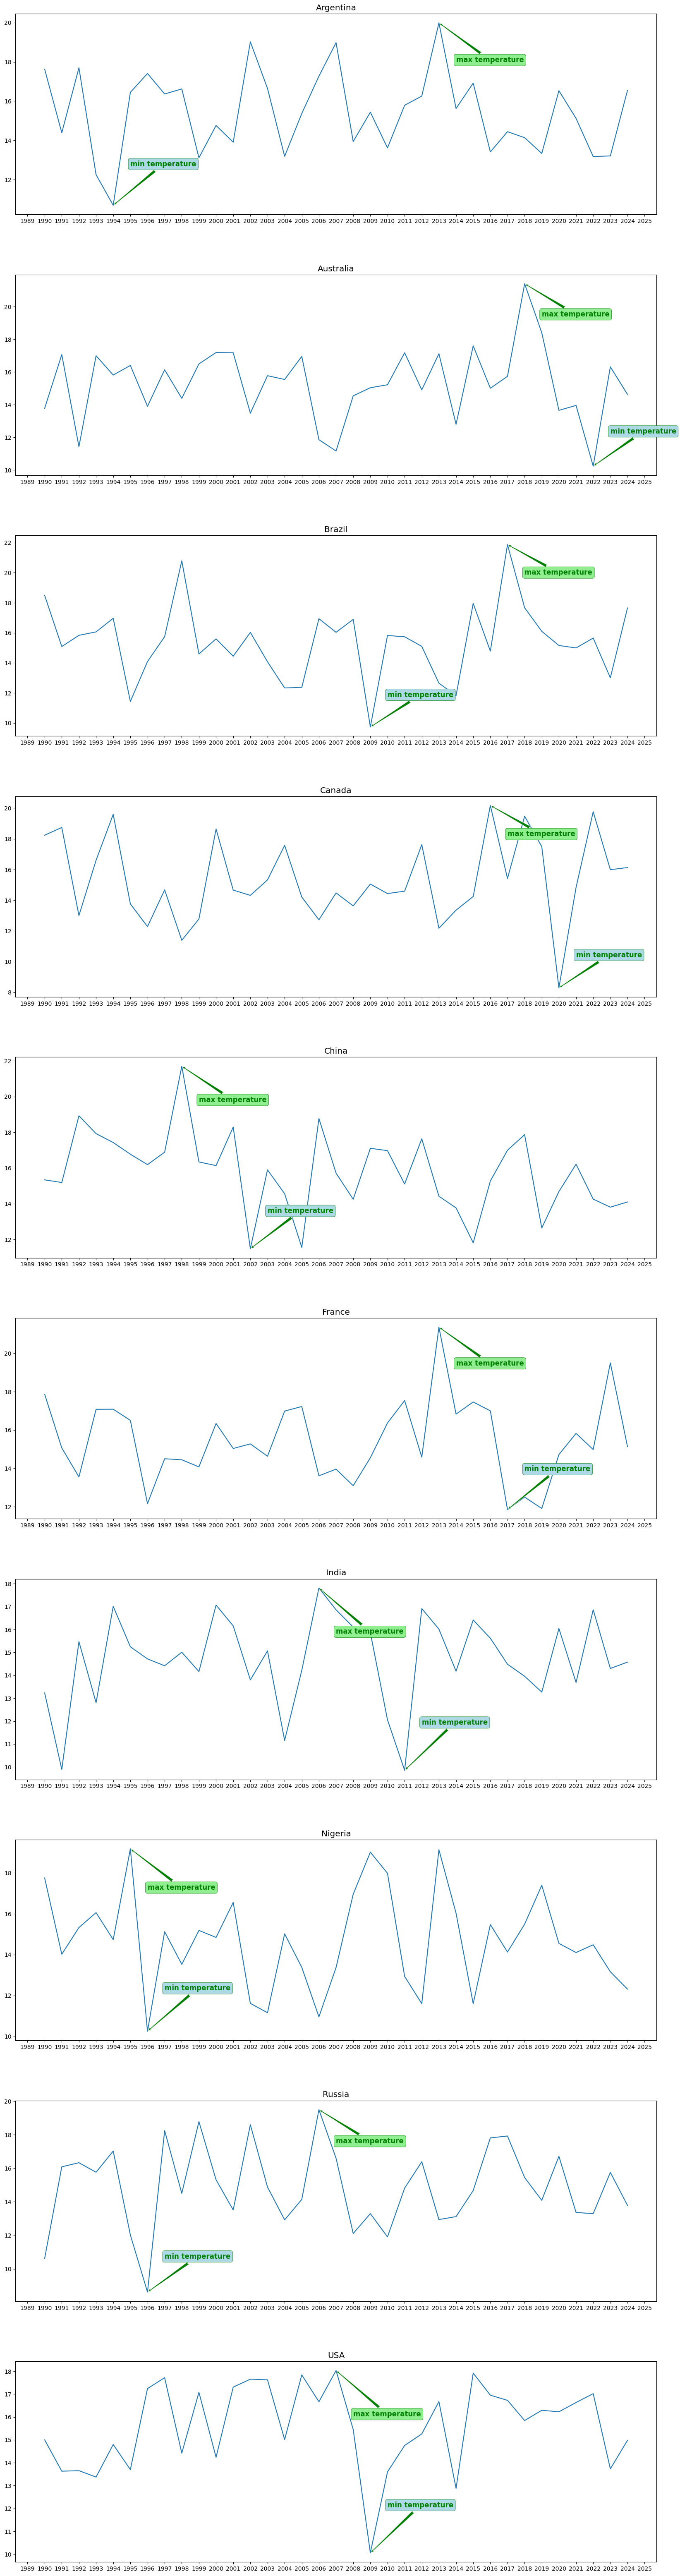

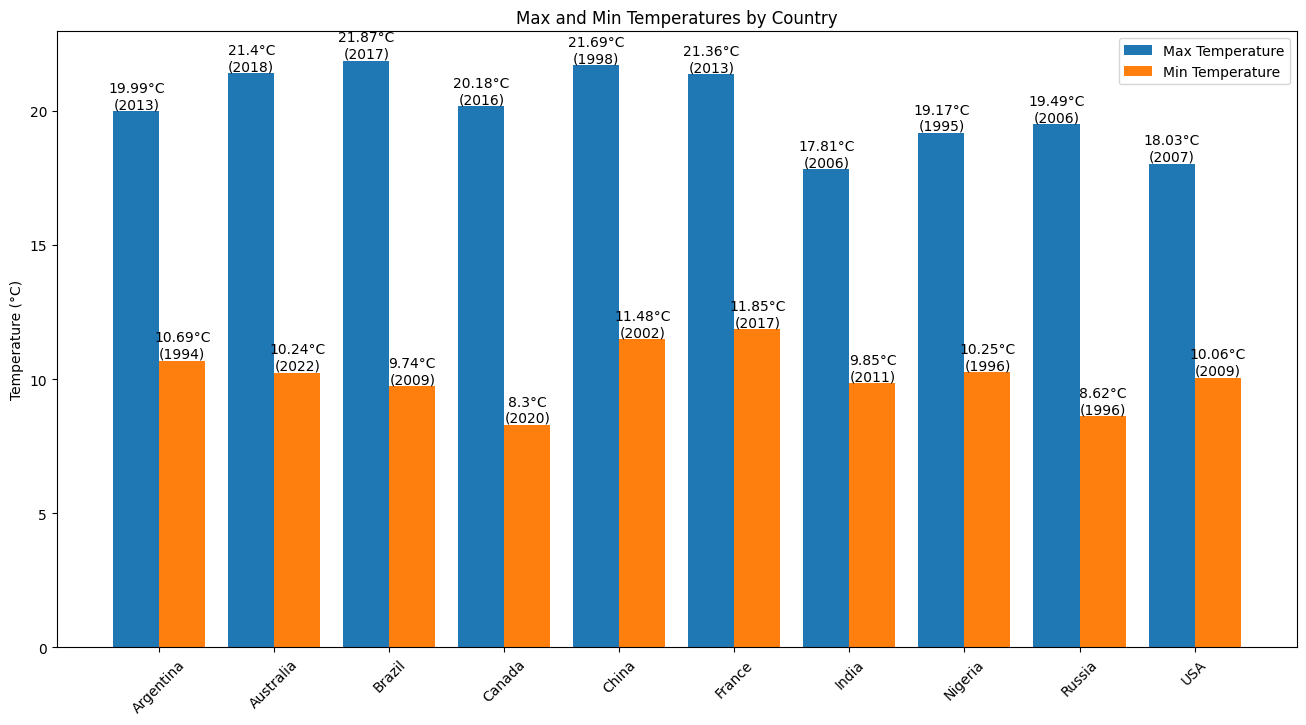

In [9]:
df = pd.read_csv("climate_change.csv")
by_countries = df.pivot_table("Average_Temperature_C",index=["Country","Year"],aggfunc=("mean")).unstack()

plots_size = by_countries.shape[0]
grid = plt.GridSpec(plots_size,1,hspace=0.3)
fig = plt.figure(figsize=(20,80))

max_temps = pd.DataFrame([],columns=["Year","Country","Temperature"])
min_temps = pd.DataFrame([],columns=["Year","Country","Temperature"])

plots = list()
for i in range(plots_size):
    plots.append(fig.add_subplot(grid[i]))

for i in range(plots_size):
    country = by_countries.iloc[i].unstack().T
    sorted_by_countries = by_countries.iloc[i].reset_index()
    sorted_by_countries = sorted_by_countries.sort_values(by=by_countries.index[i],ascending=False)
    maximum = sorted_by_countries.iloc[0,1:].copy()
    minimum = sorted_by_countries.iloc[-1,1:].copy()
    sorted_by_countries = sorted_by_countries.drop(columns=sorted_by_countries.columns[0])
    sorted_by_countries["Country"] = by_countries.index[i]
    sorted_by_countries["Temperature"] = sorted_by_countries[by_countries.index[i]]
    sorted_by_countries.drop(columns = by_countries.index[i],inplace=True)
    max_temps = pd.concat([max_temps, pd.DataFrame([sorted_by_countries.iloc[0].values], columns=["Year", "Country", "Temperature"])], axis=0,ignore_index=True)
    min_temps = pd.concat([min_temps, pd.DataFrame([sorted_by_countries.iloc[-1].values], columns=["Year", "Country", "Temperature"])], axis=0,ignore_index=True)
    with plt.style.context('ggplot'):
        plots[i].annotate('max temperature', xy=(maximum["Year"],maximum[by_countries.index[i]] ), xytext=(maximum["Year"]+1,maximum[by_countries.index[i]]-2),
                 fontsize=12, fontweight='bold', color='green', 
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='green', facecolor='lightgreen'),
                 arrowprops=dict(facecolor='green', arrowstyle='fancy'))
        plots[i].annotate('min temperature', xy=(minimum["Year"],minimum[by_countries.index[i]]), xytext=(minimum["Year"]+1,minimum[by_countries.index[i]]+2),
                 fontsize=12, fontweight='bold', color='green', 
                 bbox=dict(boxstyle='round,pad=0.3', edgecolor='green', facecolor='lightblue'),
                 arrowprops=dict(facecolor='green', arrowstyle='fancy'))
        plots[i].plot(country.index,country["Average_Temperature_C"])
        plots[i].set_title(by_countries.index[i])
        plots[i].xaxis.set_major_locator(plt.MultipleLocator(1))

main_fig, main_ax = plt.subplots(figsize=(16,8))

bar_w = 0.4

x = np.arange(len(max_temps["Country"]))

bars_max = main_ax.bar(x - bar_w/2, max_temps["Temperature"], width=bar_w, label="Max Temperature")

bars_min = main_ax.bar(x + bar_w/2, min_temps["Temperature"], width=bar_w, label="Min Temperature")

main_ax.set_xticks(x)
main_ax.set_xticklabels(max_temps["Country"], rotation=45)

for i, bar in enumerate(bars_max):
    yval = bar.get_height()
    year = max_temps["Year"].iloc[i]
    main_ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}°C\n({year})', 
                 ha='center', va='bottom', fontsize=10, color='black')

for i, bar in enumerate(bars_min):
    yval = bar.get_height()
    year = min_temps["Year"].iloc[i]
    main_ax.text(bar.get_x() + bar.get_width()/2, yval, f'{round(yval, 2)}°C\n({year})', 
                 ha='center', va='bottom', fontsize=10, color='black')

main_ax.legend()
main_ax.set_ylabel("Temperature (°C)")
main_ax.set_title("Max and Min Temperatures by Country");


### Conclusion

As you can see, there are several years in which countries have experienced significant variations in both maximum and minimum temperatures. These fluctuations highlight the diverse climatic challenges faced by different regions. For instance, some countries have recorded consistently high maximum temperatures, leading to increased heat stress on crops and heightened energy demands. In contrast, others have seen lower minimum temperatures, which can result in higher heating costs and potential agricultural setbacks.

This analysis underscores the importance of understanding these temperature patterns over time, as they directly influence agricultural practices, water resource management, and overall economic stability. By examining these trends, we can better inform strategies to mitigate the impacts of climate variability and enhance resilience in affected regions.

## 2.2. Analyzing Median Precipitation Trends in Countries 
This research investigates median precipitation levels in Countries over the past 35 years, utilizing graphical data visualization to illustrate changes and patterns. By examining yearly precipitation data, the study aims to identify trends related to climate variability, seasonal distribution, and the potential impact of extreme weather events. The findings will provide valuable insights into water resource management, agricultural planning, and climate adaptation strategies, highlighting the importance of understanding precipitation patterns in the context of ongoing climate change.

Text(0.5, 1.0, 'Percipitation Chart Bar')

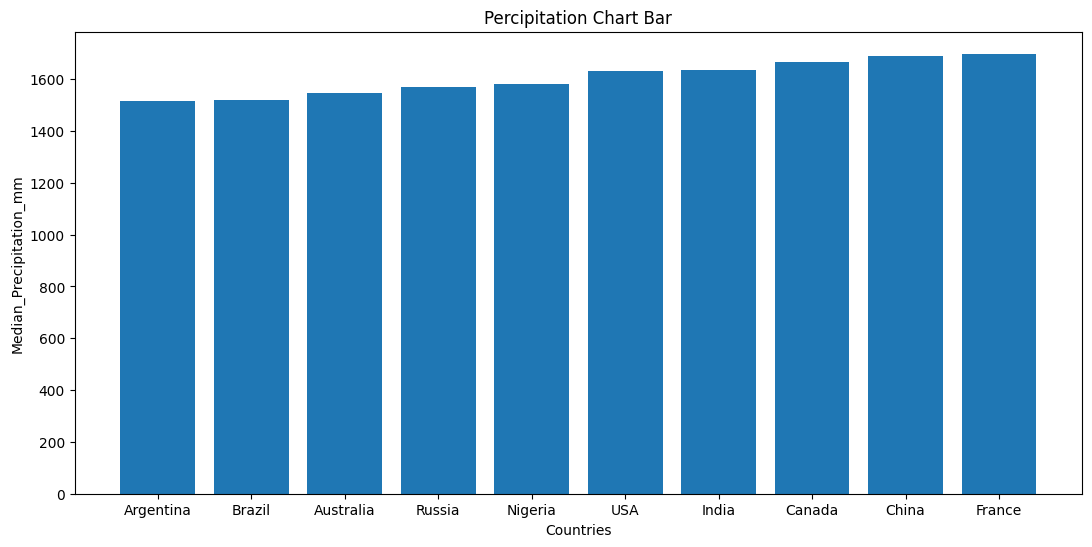

In [8]:
by_countries = df.pivot_table("Total_Precipitation_mm", index="Country", aggfunc=["median"])
by_countries = by_countries.sort_values(by=by_countries.columns[0])

plt.figure(figsize=(13, 6))
plt.bar(by_countries.index,by_countries.iloc[:, 0].values, width=0.8)
plt.xlabel('Countries')
plt.ylabel('Median_Precipitation_mm')
plt.title('Percipitation Chart Bar')

### Conclusion
Recent research shows that precipitation levels are at their maximum in France and at their minimum in Argentina. This contrast highlights the significant regional differences in climate, with France benefiting from higher rainfall, while Argentina experiences drier conditions, particularly in its arid regions. Understanding these patterns is essential for effective water management and agricultural strategies in both countries.

## 2.3. Analyzing All Countries Temperatures with Maps

The code retrieves country names and their average temperatures from a DataFrame, adjusts the naming for consistency, and fetches latitude and longitude data for relevant countries.

It then loads a shapefile containing country boundaries, maps the average temperatures onto the geographical data, and filters for the selected countries.

Finally, it creates a map that visually represents the average temperatures with a color bar for reference.

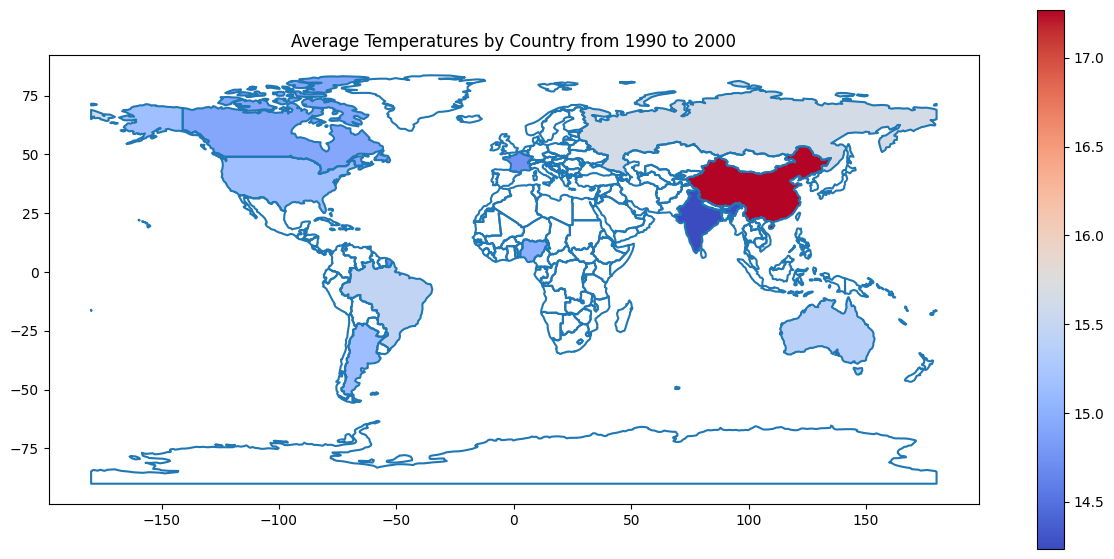

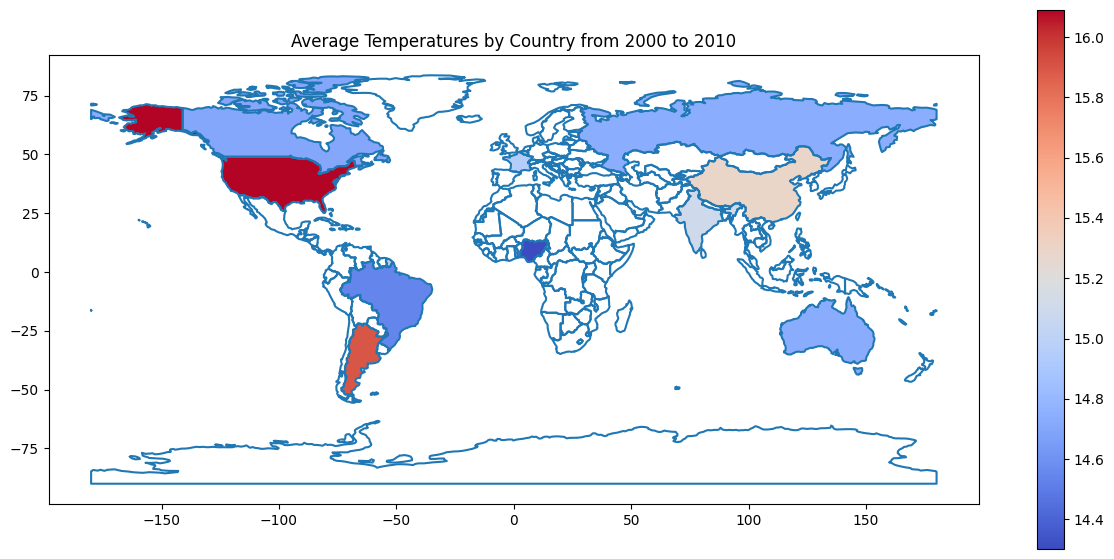

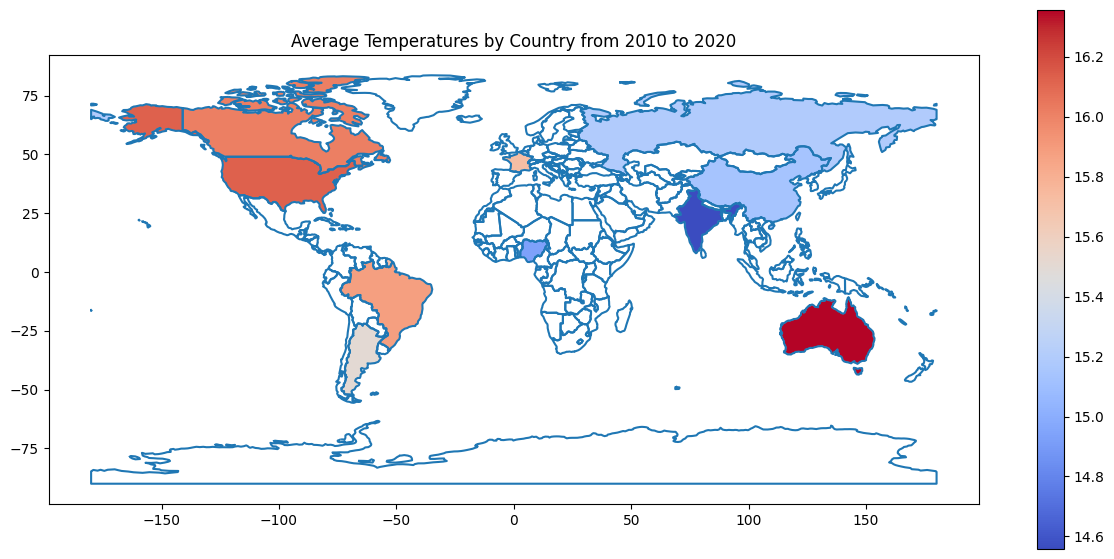

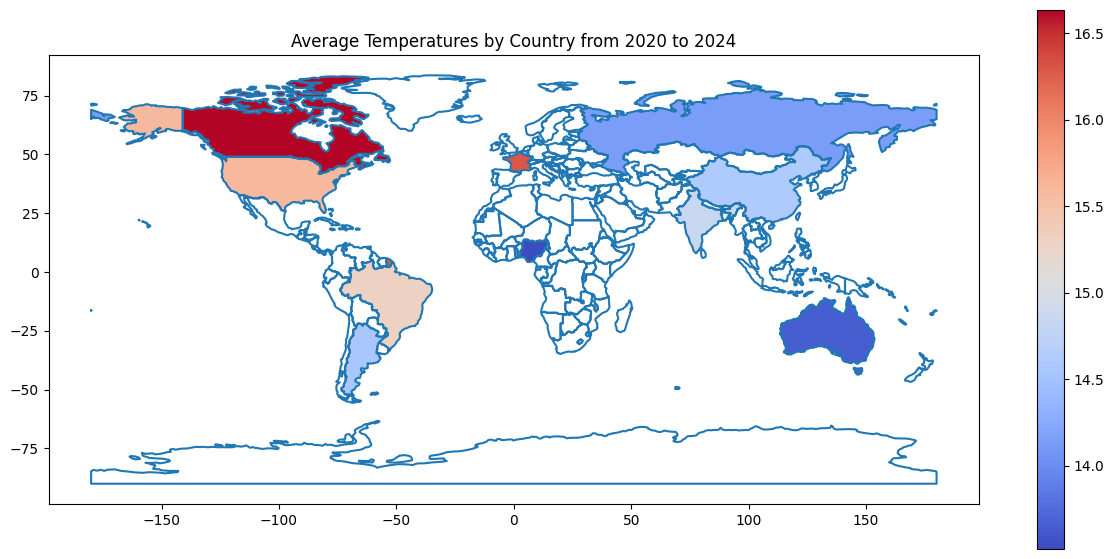

In [7]:
countries = df['Country'].unique()
countries_series = pd.Series(countries)

countries_coords = pd.read_csv('https://gist.githubusercontent.com/tadast/8827699/raw/61b2107766d6fd51e2bd02d9f78f6be081340efc/countries_codes_and_coordinates.csv')

filtered_countries_coords = countries_coords[countries_coords['Country'].isin(countries_series)]
filtered_countries_coords = filtered_countries_coords[['Country', 'Latitude (average)', 'Longitude (average)']].reindex()
cleaned_countries_coords = filtered_countries_coords.set_index('Country')

years_in_total = df['Year'].sort_values().unique()
decades = years_in_total[::10]
max_year = years_in_total[-1]

changed_df = df.replace('USA', 'United States of America')
shapefile_path = 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'

for decade_index in range(len(decades)):
    try:
        countries_by_decade = changed_df[(changed_df['Year'] > decades[decade_index]) & (changed_df['Year'] < decades[decade_index + 1])]
    except IndexError:
        countries_by_decade = changed_df[changed_df['Year'] > decades[decade_index]]

    country_temperatures = pd.pivot_table(countries_by_decade, values=['Average_Temperature_C'], index=['Country'],
                                aggfunc="mean").to_dict()['Average_Temperature_C']
    
    world = gpd.read_file(shapefile_path)
    world['avg_temp'] = world['NAME'].map(country_temperatures)
    world[world['NAME'].isin(countries_series)]

    fig, ax = plt.subplots(1, 1, figsize=(15, 7))

    world.boundary.plot(ax=ax)
    world.plot(column='avg_temp', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=plt.Normalize(vmin=min(country_temperatures.values()), vmax=max(country_temperatures.values())))
    sm.set_array([])

    try:
        plt.title(f'Average Temperatures by Country from {decades[decade_index]} to {decades[decade_index + 1]}')
    except IndexError:
        plt.title(f'Average Temperatures by Country from {decades[decade_index]} to {max_year}')
    
    plt.show()


### Conclusion
Recent analysis of average temperatures worldwide highlights significant variations among countries, with the hottest regions marked in red. This visualization showcases the extreme average temperatures found in parts of the America and Asia, while many northern countries maintain much cooler averages.
Understanding these average temperature differences is crucial for addressing climate change impacts, adapting agricultural practices, and managing natural resources effectively. The contrasting temperatures underscore the importance of developing targeted strategies to respond to the diverse climatic conditions experienced across the globe.

## 2.4. Analyzing the Economic Impact of the Agricultural Sector of Countries
This study explores the economic impact of the agricultural sector of countries over the past several years (decades). It analyzes how changes in agricultural productivity, crop yields.By examining case studies, the research highlights the role of agriculture in economics.Additionally, it investigates the effects of technological advancements and climate change on agricultural practices and economic outcomes. The findings aim to provide insights into the vital importance of agriculture for sustainable economic growth and resilience.

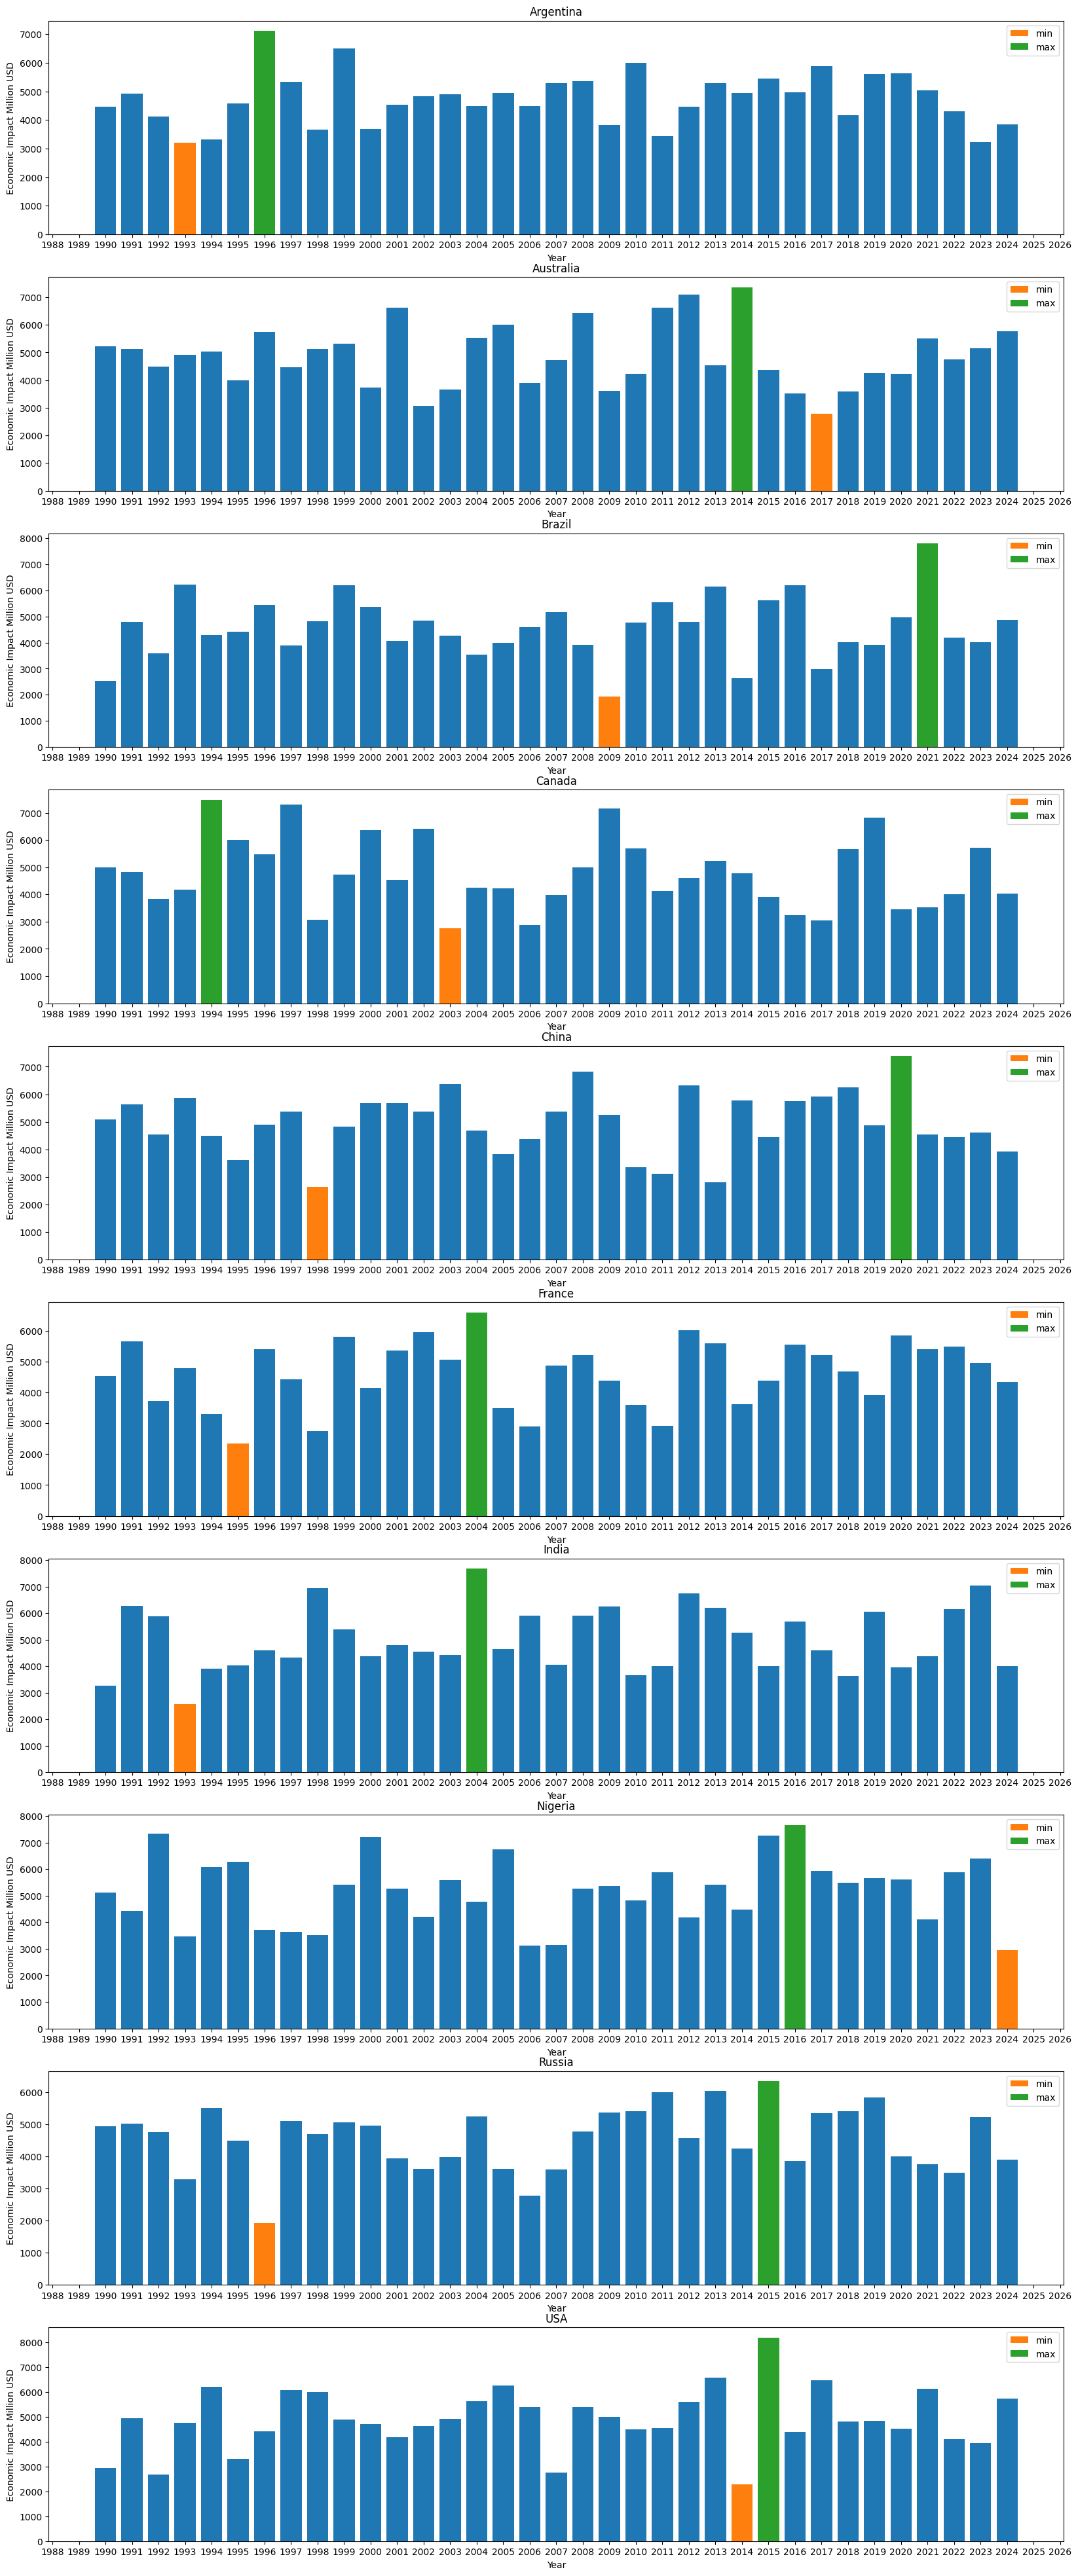

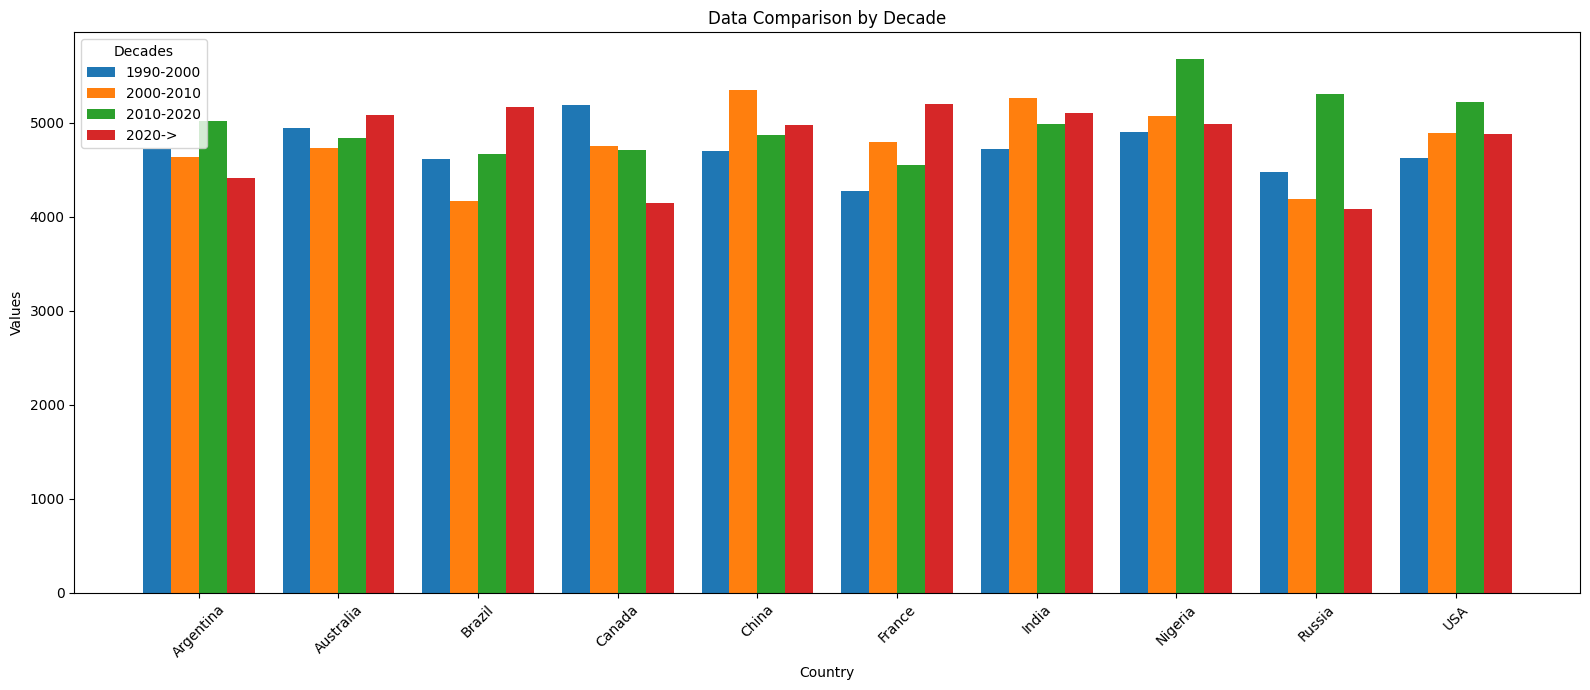

In [10]:
df.dropna(inplace=True)
by_countries_USD = df.pivot_table("Economic_Impact_Million_USD",index=["Country","Region","Year"],aggfunc=["sum"])
by_countries_USD = by_countries_USD.unstack().groupby("Country").mean()

plots_size = by_countries.shape[0]
grid = plt.GridSpec(plots_size,1)
fig = plt.figure(figsize=(20,50))
with_decades = by_countries_USD.T.reset_index().copy()
with_decades = with_decades.drop(columns=with_decades.columns[0:2])
with_decades["decade"] = 10*(with_decades["Year"] // 10)
with_decades = with_decades.drop(columns="Year").groupby("decade").mean()

plots = list()

for i in np.arange(plots_size):
    plots.append(fig.add_subplot(grid[i]))

for i in np.arange(plots_size):
    country = by_countries_USD.iloc[i].unstack()
    sorted_country = by_countries_USD.iloc[i].sort_values().reset_index()
    minimal = sorted_country.iloc[0,1:].values
    maximal = sorted_country.iloc[-1,1:].values

    plots[i].bar(country.columns,country.values.ravel())
    plots[i].bar(minimal[1],minimal[2],label="min")
    plots[i].bar(maximal[1],maximal[2],label="max")
    plots[i].xaxis.set_major_locator(plt.MultipleLocator(1))
    plots[i].set_title(by_countries_USD.index[i])
    plots[i].set_xlabel("Year")
    plots[i].set_ylabel("Economic Impact Million USD")
    plots[i].legend()

plt.show()
fig, ax = plt.subplots(figsize=(16, 7))
bar_w = 0.2

x = np.arange(len(with_decades.columns))

ax.bar(x - bar_w * 1.5, with_decades.iloc[0], width=bar_w, label="1990-2000")
ax.bar(x - bar_w * 0.5, with_decades.iloc[1], width=bar_w, label="2000-2010")
ax.bar(x + bar_w * 0.5, with_decades.iloc[2], width=bar_w, label="2010-2020")
ax.bar(x + bar_w * 1.5, with_decades.iloc[3], width=bar_w, label="2020->")

ax.set_xticks(x)
ax.set_xticklabels(with_decades.columns, rotation=45)
ax.set_xlabel('Country')
ax.set_ylabel('Values')
ax.set_title('Data Comparison by Decade')
ax.legend(title='Decades')

plt.tight_layout()
plt.show()

### Conclusion
The economic impact of agriculture on countries over several years showcases both maximum and minimum performance results for several years that significantly shape national economies.
The economic impact of agriculture over decades reveals profound trends that shape national and global economies.Conversely, decades marked by agricultural decline—due to climate change, resource depletion, or market instability—can result in significant challenges.Long-term analysis of agricultural performance is essential for policymakers. It allows for the identification of trends, guiding investments in technology, sustainability, and infrastructure to support farmers and ensure resilient food systems for the future. Overall, the enduring influence of agriculture on economic health underscores its critical role in fostering development and stability across nations.

## 2.5. Analyzing the Average Crop Yields of Major Agricultural Products in Various Countries
This study investigates the average crop yields of major agricultural products in various countries, analyzing the factors that influence these yields, such as climate, soil health, farming practices, and technological advancements. By comparing crop yield data across regions, the research aims to identify trends, challenges, and opportunities for improvement. Understanding these averages will provide insights into food security, agricultural productivity, and the economic impact of crop production on national economies. The findings will also highlight best practices that can be adopted to enhance crop yields sustainably.

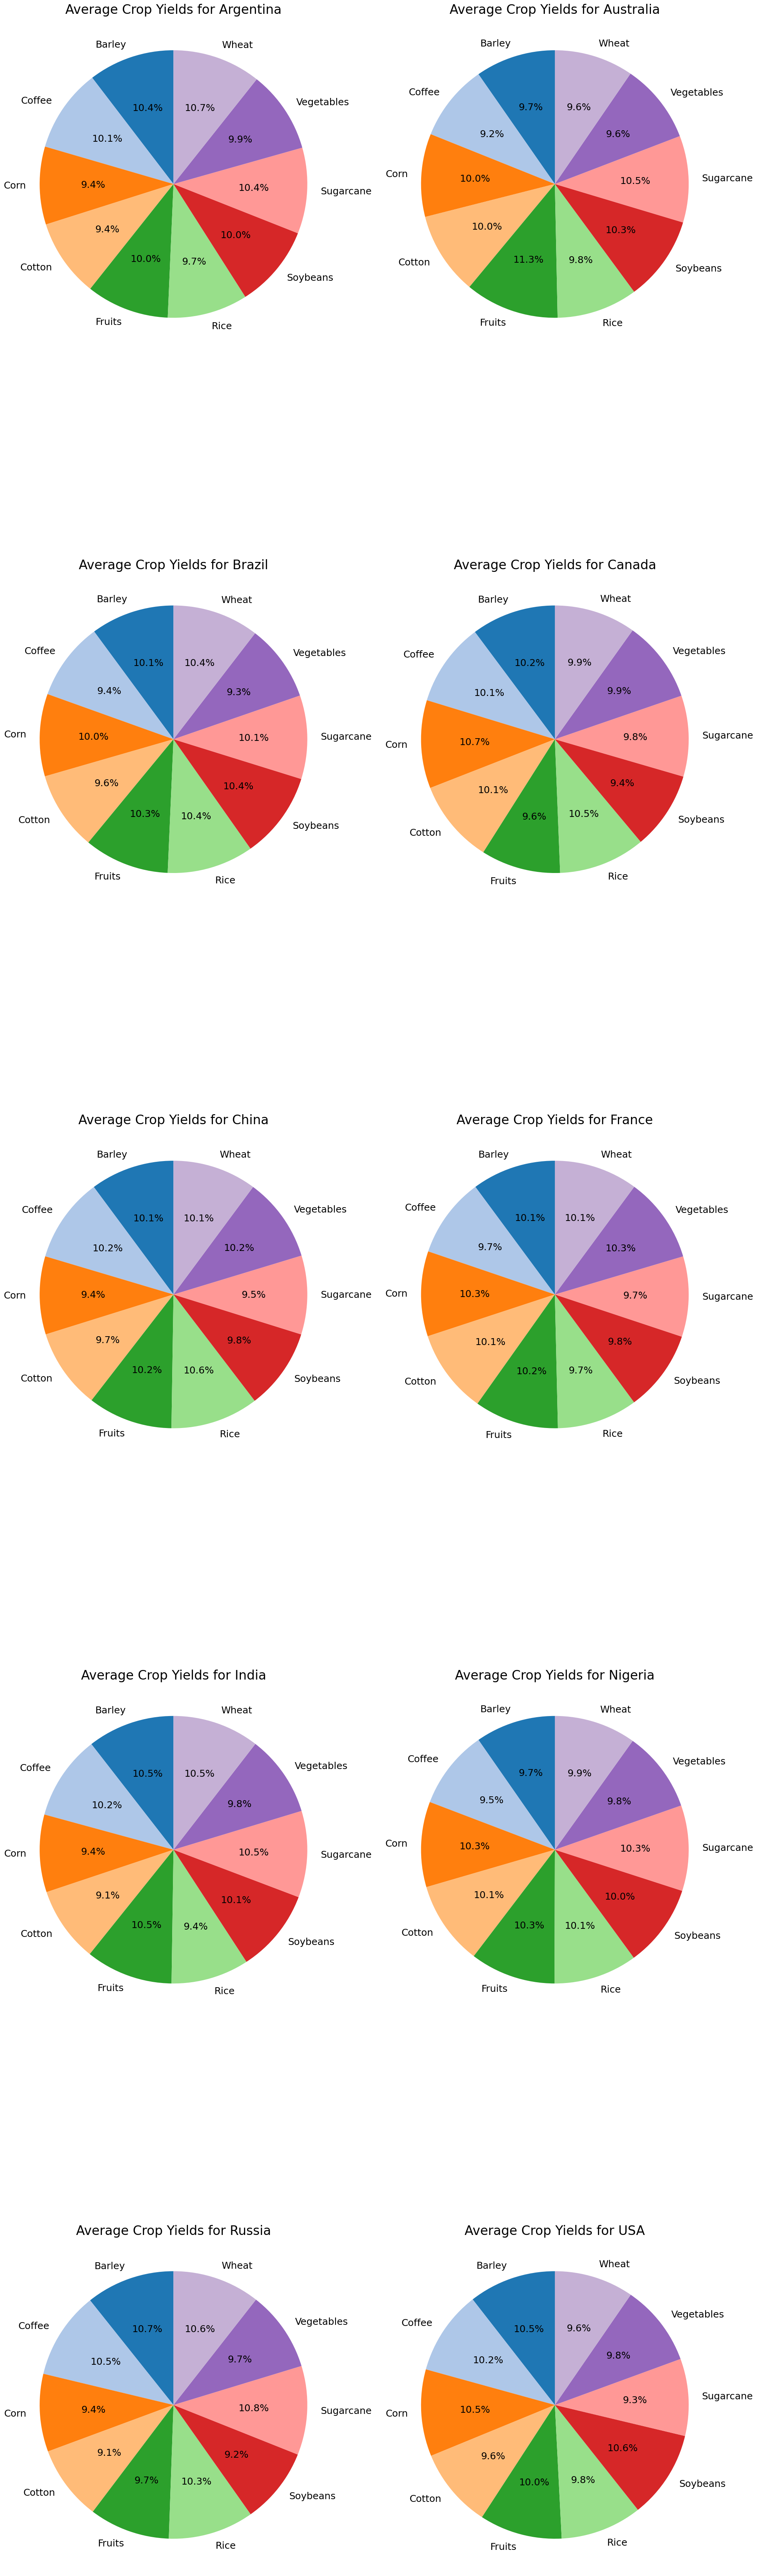

In [11]:
crop_filtered_df = pd.pivot_table(df, values=['Crop_Yield_MT_per_HA'], index=['Country'], columns=['Crop_Type'], aggfunc="mean")

countries = crop_filtered_df.index
num_countries = len(countries)
num_cols = 2
num_rows = math.ceil(num_countries / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 75))
axes = axes.flatten()

for i, country in enumerate(countries):
    ax = axes[i]
    crop_yields = crop_filtered_df.loc[country].values
    crop_types = crop_filtered_df.columns.get_level_values(1)
    
    ax.pie(crop_yields, labels=crop_types, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors, textprops=dict(fontsize=18))
    ax.set_title(f'Average Crop Yields for {country}', fontdict=dict(fontsize=24))

plt.tight_layout()
plt.show()


### Conclusion
As we can see, the percentage of crop production depends significantly on the location of a country and its climate area. Different regions have varying climates that affect the types of crops that can be cultivated. For instance, tropical areas with ample rainfall and warm temperatures are ideal for growing crops like rice and bananas, while temperate regions may be better suited for wheat and barley.

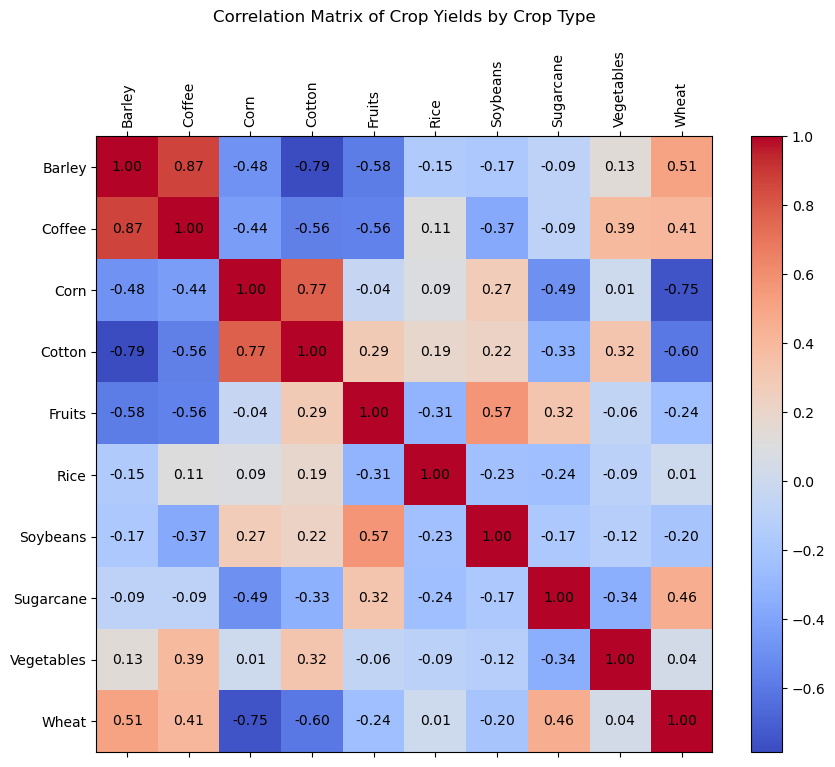

In [13]:
correlation_matrix = crop_filtered_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))

cax = ax.matshow(correlation_matrix, cmap='coolwarm')

fig.colorbar(cax)

ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))

ax.set_xticklabels(correlation_matrix.columns.get_level_values(1))
ax.set_yticklabels(correlation_matrix.index.get_level_values(1))

plt.xticks(rotation=90)

for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix of Crop Yields by Crop Type', pad=20)
plt.show()

### Conclusion: Here we can see the Correlation Matrix of Crop Yields by Crop Type

## 2.6. Analyzing the Relationship Between Soil Health and Pesticide Use Across Various Countries
This research examines the relationship between soil health and pesticide use across various countries, analyzing how agricultural practices impact soil quality and ecosystem sustainability. By comparing data on soil health indicators—such as organic matter content, microbial activity, and nutrient levels—with pesticide usage rates, the study aims to uncover trends and correlations. It will explore the implications of pesticide reliance on soil health, crop yields, and environmental outcomes. The findings will provide insights into best practices for sustainable agriculture, highlighting the need for balanced approaches that protect soil health while managing pests effectively.

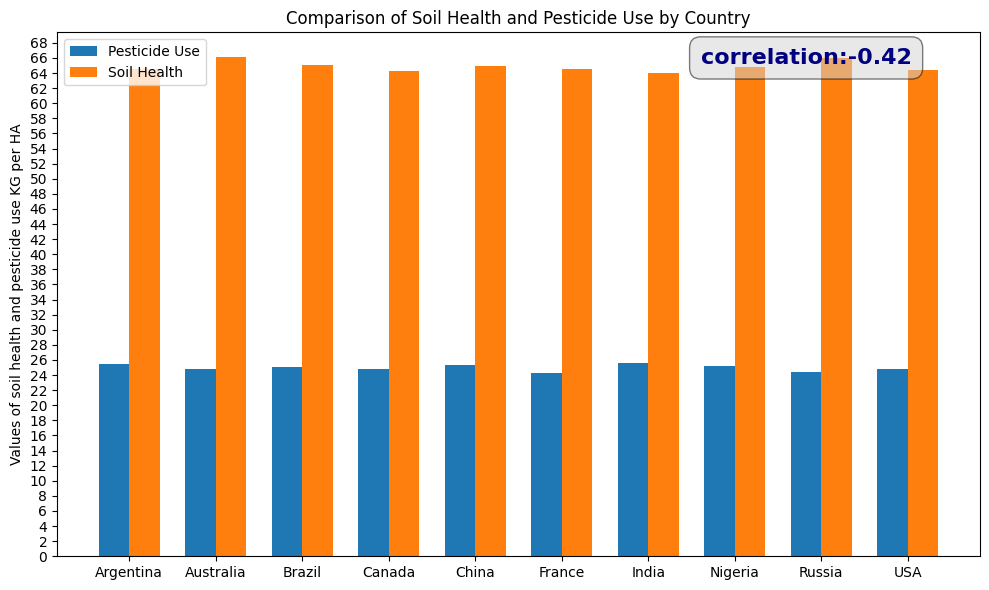

In [12]:
df.dropna()
by_countries = df.pivot_table(["Soil_Health_Index","Pesticide_Use_KG_per_HA"],index=["Country","Region"])

by_countries = by_countries.groupby("Country").median()

correlation = by_countries["Pesticide_Use_KG_per_HA"].corr(by_countries["Soil_Health_Index"])
bar_width = 0.35
x = range(len(by_countries.index))
plt.figure(figsize=(10,6))
plt.bar(x, by_countries['Pesticide_Use_KG_per_HA'], width=bar_width, label="Pesticide Use", align='center')
plt.bar([p + bar_width for p in x], by_countries['Soil_Health_Index'], width=bar_width, label="Soil Health", align='center')

plt.xticks([p + bar_width / 2 for p in x], by_countries.index)
plt.yticks(np.arange(0,70,2),np.arange(0,70,2))
plt.ylabel('Values of soil health and pesticide use KG per HA')
plt.title('Comparison of Soil Health and Pesticide Use by Country')
plt.text(8, 66, f'correlation:{"{:.2f}".format(float(correlation))}',
         fontsize=16,       
         fontweight='bold',
         color='navy',      
         ha='center',       
         va='center',       
         bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5'))
plt.legend()
plt.tight_layout()

### Conclusion
We are seeing the inverse connection of soil health and pesticide use for each country. Higher pesticide application often leads to lower soil health, as chemical residues can disrupt microbial communities and degrade soil structure. This decline in soil quality impacts agricultural productivity and ecosystem balance, making it challenging for farmers to maintain sustainable practices.
Higher pesticide application results in poorer soil health.

## 2.7. Analyzing the Correlation Between Irrigation Access and Crop Yields Measured in Metric Tons per Hectare (MT/HA) Across Various Countries
This research investigates the correlation between irrigation access and crop yields measured in metric tons per hectare (MT/HA) across various countries. By analyzing data on irrigation infrastructure, water management practices, and agricultural outputs, the study aims to determine how improved access to irrigation impacts crop productivity. It will explore case studies from both water-scarce and water-abundant regions to highlight the differences in crop yields resulting from varying levels of irrigation access. The findings will provide insights into the importance of irrigation for enhancing food security, optimizing resource use, and promoting sustainable agricultural practices, particularly in the face of climate change and increasing global food demand

In [15]:
by_regions = df.pivot_table(["Irrigation_Access_%","Crop_Yield_MT_per_HA"],index=["Region","Year"])

regions = df["Region"].unique().astype("str")
plots_size = regions.size
plots = list()
grid = plt.GridSpec(plots_size,1)
fig = plt.figure(figsize=(30,300))
for i in range(plots_size):
    plots.append(fig.add_subplot(grid[i]))
indx = pd.IndexSlice

for i in range(plots_size):
    region =  by_regions.loc[indx[regions[i]],:]

    width = 0.4  
    x = np.arange(len(region.index)) 
    plots[i].bar(x - width/2, region["Irrigation_Access_%"], width, label="Irrigation Access")
    plots[i].bar(x + width/2, region["Crop_Yield_MT_per_HA"] * 15, width, label="Crop Yield MT/HA")
    plots[i].set_xticks(x)
    plots[i].set_xticklabels(region.index, rotation=45)
    
    plots[i].set_title(regions[i])
    plots[i].set_xlabel("years")
    plots[i].set_ylabel("MT/HA *15")
    plots[i].legend()

### Conclusion
We can see that the correlations for each region is close to zero wich means they have no connection which is good data.The absence of a strong correlation is good data, as it implies that other variables—such as soil health, climate conditions, or farming practices—could play more critical roles in determining crop yields. This insight encourages a more comprehensive approach to agricultural research and policy, promoting the need for localized strategies that consider the unique characteristics of each region.This finding is particularly noteworthy as it suggests that factors influencing crop yields may not solely depend on irrigation availability, allowing for a more nuanced understanding of agricultural productivity.


## 2.8. Analyzing the Patterns of Pesticide and Fertilizer Use per Hectare in Various Countries
This research examines the patterns of pesticide and fertilizer use per hectare in various countries, analyzing how these inputs impact agricultural productivity and environmental sustainability. By comparing data on the quantities of pesticides and fertilizers applied across different regions, the study aims to identify trends and correlations with crop yields and soil health. It will explore the implications of intensive agricultural practices on ecosystems and human health, as well as the effectiveness of regulatory frameworks. The findings will provide valuable insights into best practices for sustainable agriculture, highlighting the need for balanced nutrient management that optimizes crop production while minimizing environmental risks.

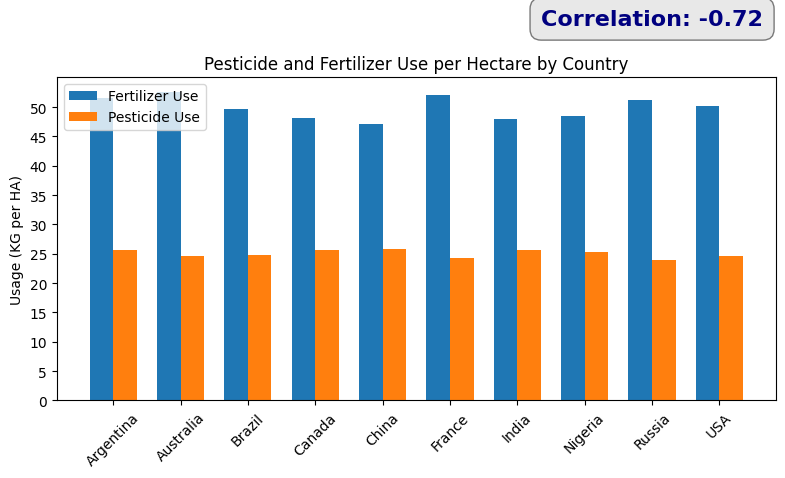

In [17]:
by_countries = df.groupby("Country")[["Pesticide_Use_KG_per_HA","Fertilizer_Use_KG_per_HA"]].median()
correlation = by_countries["Pesticide_Use_KG_per_HA"].corr(by_countries["Fertilizer_Use_KG_per_HA"])


bar_width = 0.35
x = np.arange(by_countries.shape[0])

plt.figure(figsize=(8,5))
plt.bar(x - bar_width/2, by_countries['Fertilizer_Use_KG_per_HA'], width=bar_width, label='Fertilizer Use',align='center')
plt.bar(x + bar_width/2, by_countries['Pesticide_Use_KG_per_HA'], width=bar_width, label='Pesticide Use',align='center')

plt.xticks(x, by_countries.index, rotation=45)
plt.yticks(np.arange(0,55,5),np.arange(0,55,5))
plt.ylabel('Usage (KG per HA)')
plt.title('Pesticide and Fertilizer Use per Hectare by Country')
plt.legend(loc="upper left")
plt.text(
    8, 65, f'Correlation: {correlation:.2f}',
    fontsize=16,
    fontweight='bold',
    color='navy',
    ha='center',
    va='center',
    bbox=dict(facecolor='lightgray', alpha=0.5, boxstyle='round,pad=0.5')
)
plt.tight_layout()
plt.show()

### Conclusion
This is the connnection of pesticide use and fertilizer use for each country. While the connection between pesticide and fertilizer use may enhance immediate agricultural output, it underscores the need for more sustainable practices. Our research highlights the importance of integrated pest management and the adoption of organic farming methods to reduce dependence on chemical inputs. By promoting balanced agricultural practices, countries can improve both crop productivity and environmental health, ensuring a more sustainable future for agriculture.

## 2.9. Analyzing the Economic Impact of Countries by Adaptation Type

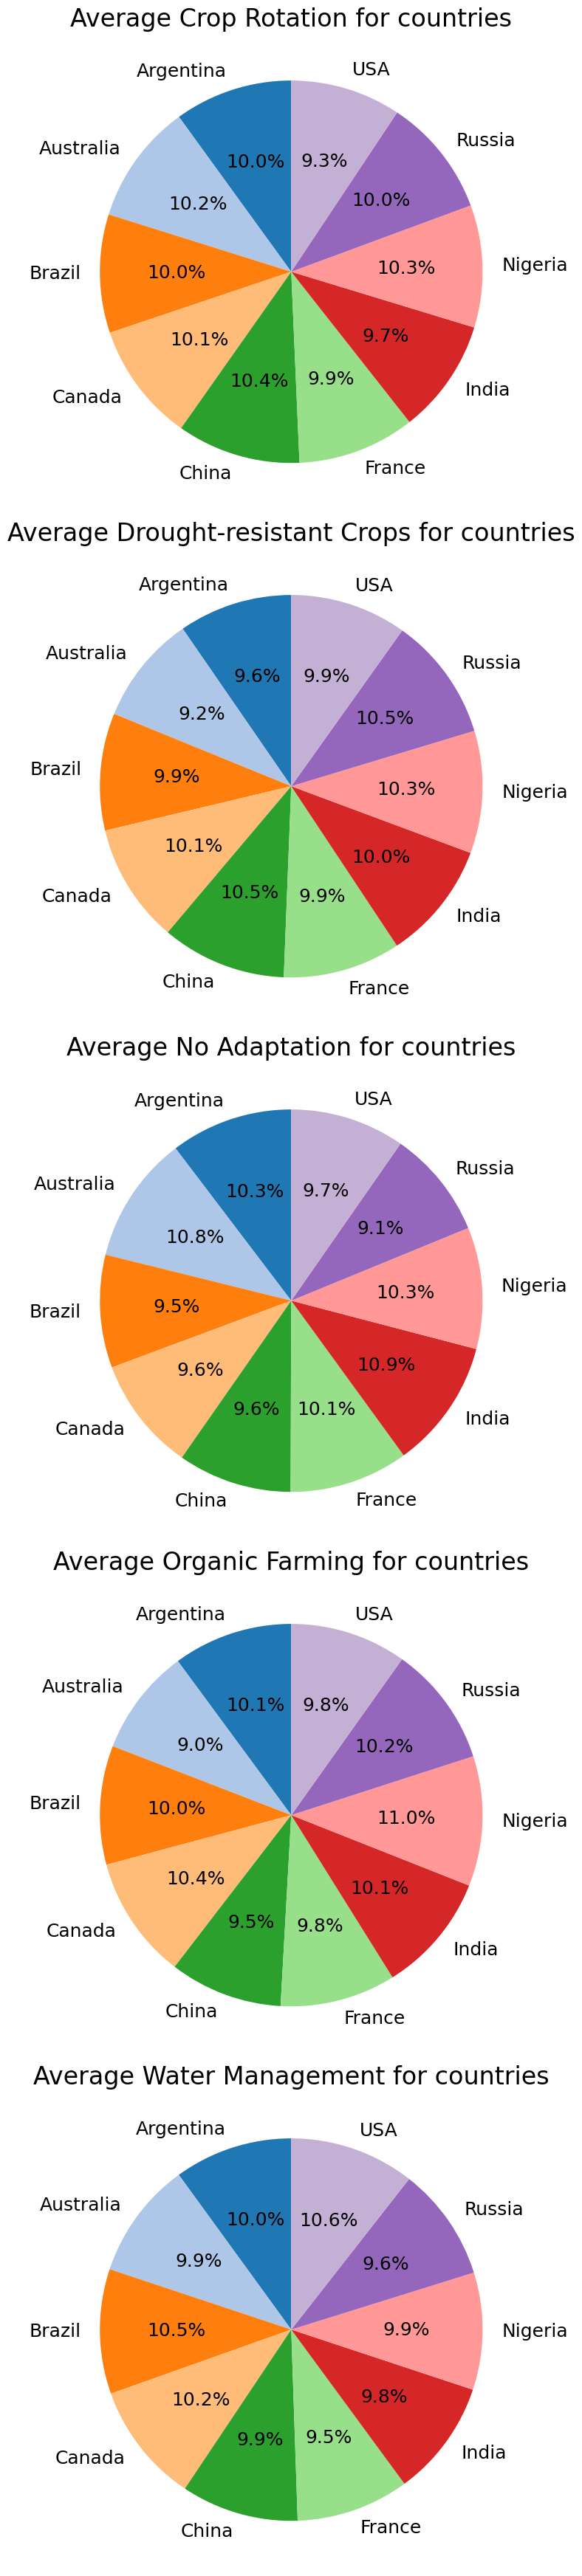

In [18]:
adaptation_filtered_df = pd.pivot_table(df, values=["Economic_Impact_Million_USD"], index=["Country"], columns=["Adaptation_Strategies"], aggfunc="mean")

adaptation_types = adaptation_filtered_df.columns
num_adaptation_types = len(adaptation_types)
num_cols = 1
num_rows = math.ceil(num_adaptation_types / num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 35))

axes = axes.flatten()

for i, adapt_type in enumerate(adaptation_types):
    ax = axes[i]

    adapt_values = adaptation_filtered_df[adapt_type].values
    adapt_types = adaptation_filtered_df.index.values
    
    ax.pie(adapt_values, labels=adapt_types, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors, textprops=dict(fontsize=18))
    ax.set_title(f'Average {adapt_type[1]} for countries', fontdict=dict(fontsize=24))

plt.tight_layout()
plt.show()

### Conclusion
Here we can see several diagrams:
1st - average crop rotation for countries
2nd - average drought-resistant crops for countries
3th - average no adaptation for countries
4th - average organic farming for countries
5th - average water managment for countries.

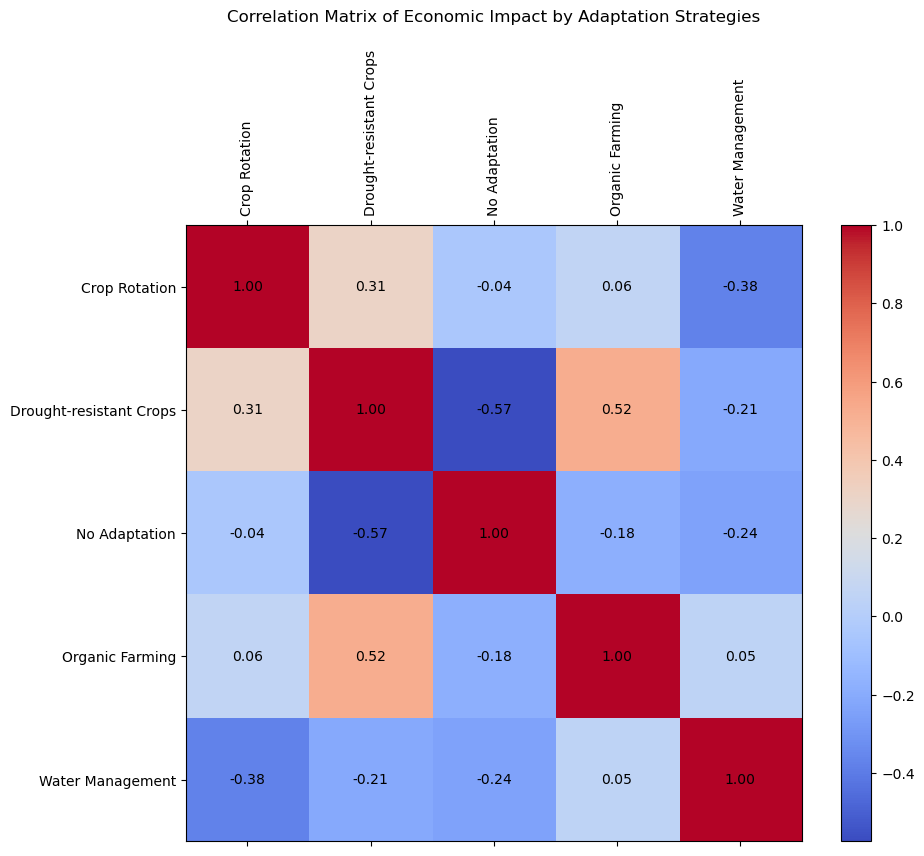

In [19]:
correlation_matrix = adaptation_filtered_df.corr()

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cax)

ax.set_xticks(np.arange(len(correlation_matrix.columns)))
ax.set_yticks(np.arange(len(correlation_matrix.index)))

ax.set_xticklabels(correlation_matrix.columns.get_level_values(1))
ax.set_yticklabels(correlation_matrix.index.get_level_values(1))

plt.xticks(rotation=90)

for (i, j), val in np.ndenumerate(correlation_matrix.values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix of Economic Impact by Adaptation Strategies', pad=20)
plt.show()

### Conclusion: Here we can see the Correlation Matrix of Economic Impact by Adaptation Strategies.


## 2.10. Analyzing the Economic Impact of all Countries Over the Years

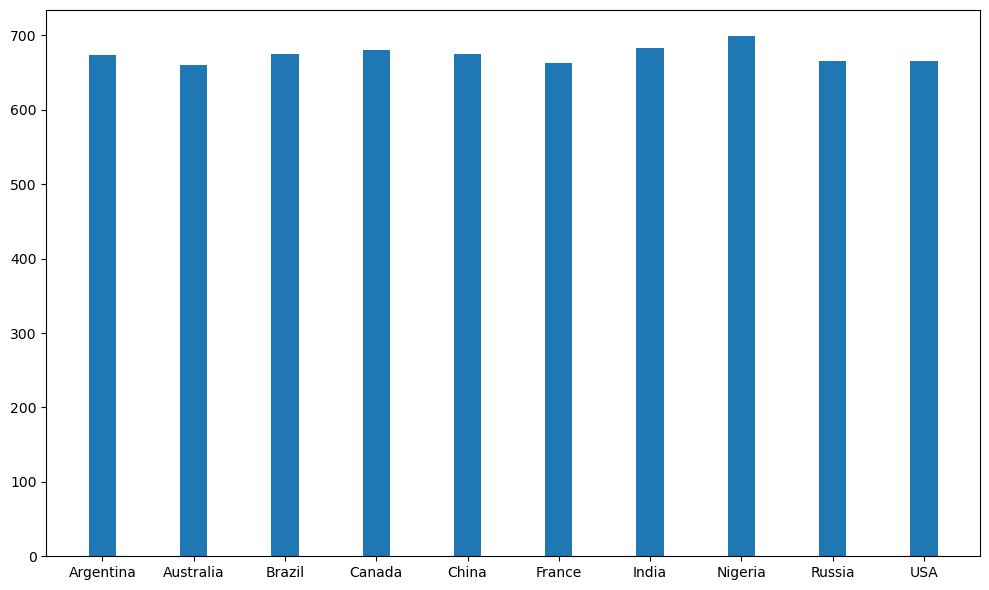

In [20]:
grouped_df = df.groupby('Country')['Economic_Impact_Million_USD'].mean()

x = range(len(grouped_df.index))
bar_width=0.3

plt.figure(figsize=(10,6))
plt.bar(grouped_df.index, grouped_df, width=bar_width, label="Economic impact of all countries", align='center')

plt.tight_layout()
plt.show()

### Conclusion: This analysis shows the economic impact of all countries(by million USD)

## 2.11. Analyzing the Extreme Wheather events impact to Crop Yield

Extreme weather events, such as droughts, floods, and heatwaves, have a profound impact on agricultural productivity. Droughts can lead to water shortages, stunting crop growth and reducing yields. Conversely, heavy rainfall can cause flooding, which damages crops and promotes disease. Heatwaves can disrupt pollination and reduce crop quality.Understanding these impacts is crucial for developing adaptive strategies and ensuring sustainable agriculture in a changing climate. In this research we can see the correlation value between extreme wheather and the crop yield.

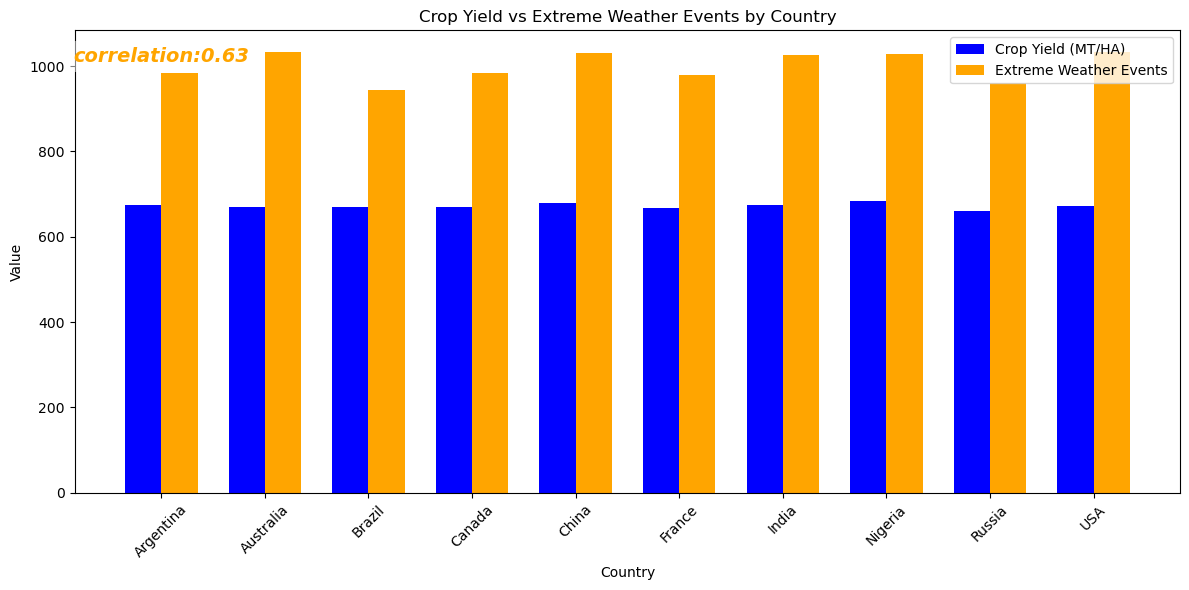

In [21]:
by_countries1 = df.groupby("Country")[["Crop_Yield_MT_per_HA"]].mean()
by_countries2 = df.groupby("Country")[["Extreme_Weather_Events"]].count()

combined = pd.merge(by_countries1, by_countries2, on="Country")
correlation = combined["Extreme_Weather_Events"].corr(combined["Crop_Yield_MT_per_HA"])
combined.columns = ["Crop_Yield_MT_per_HA", "Extreme_Weather_Events"]

plt.figure(figsize=(12, 6))

x = np.arange(len(combined.index))  
width = 0.35  
plt.bar(x - width/2, combined["Crop_Yield_MT_per_HA"]*300, width, label='Crop Yield (MT/HA)', color='blue')
plt.bar(x + width/2, combined["Extreme_Weather_Events"], width, label='Extreme Weather Events', color='orange')
plt.text(0, 1000, f'correlation:{np.round(correlation,2)}', 
         fontsize=14, 
         color='orange', 
         weight='bold', 
         style='italic', 
         ha='center', 
         va='bottom', 
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Crop Yield vs Extreme Weather Events by Country')
plt.xticks(x, combined.index, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


### Conclusion: Here is the Corelation of Crop Yield and Extreme Wheather Events

# 3. Conclusion Summary:


### This project provides a comprehensive analysis of agricultural productivity and climate trends across various countries over the past decades.

### By examining long-term temperature and precipitation trends, the study highlights significant patterns related to climate change and its impact on agriculture. The research also explores the economic influence of agricultural productivity, the role of technological advancements, and the importance of irrigation access in enhancing crop yields.

### Additionally, the project delves into the relationship between soil health and pesticide use, emphasizing sustainable agricultural practices. The findings underscore the critical need for adaptive strategies to ensure food security, optimize resource use, and promote sustainable economic growth in the face of ongoing climate challenges.